In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [27]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/yelp_ratings.csv')

In [29]:
data.head()

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0


In [30]:
data.describe()

,stars,sentiment
count,44530.000000,44530.000000
mean,3.834449,0.748507
std,1.513973,0.433876
min,1.000000,0.000000
25%,2.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## Pre-processing & EDA

In [31]:
data['sentiment'].unique()

array([0, 1])

In [0]:
# map the 'sentiment' values
labels = data['sentiment'].map({1: 'POSITIVE', 0: 'NEGATIVE'})

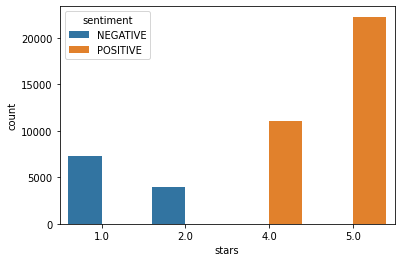

In [33]:
sns.countplot(data['stars'],hue=labels)

In [0]:
# create a new column from 'labels'
data['labels'] = labels

In [0]:
# create a new column to count the number of text
data['text_count'] = data['text'].apply(len)

Text(0.5, 1.0, 'Histogram for the Number of Text')

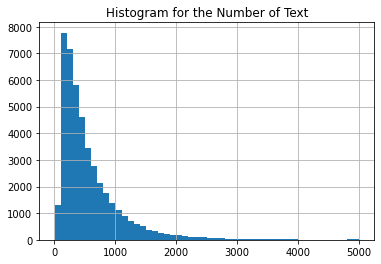

In [36]:
data['text_count'].hist(bins=50)

plt.title('Histogram for the Number of Text')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91537ae3c8>,
      dtype=object)

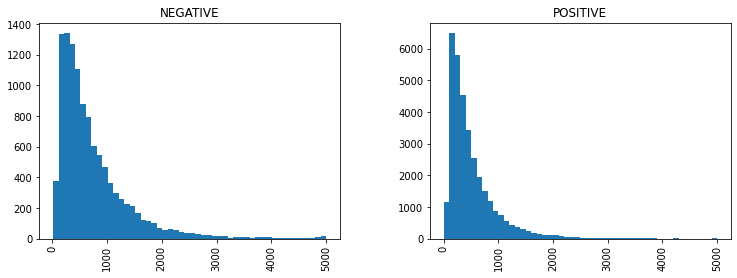

In [37]:
data.hist(column='text_count', by='labels', bins=50,figsize=(12,4))

In [38]:
import string

# get the 'stopwords' package from nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """

    # check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [40]:
# check the head to see if the function is working properly
data['text'].head().apply(text_process)

0    [Total, bill, horrible, service, 8Gs, crooks, ...
1    [adore, Travis, Hard, Rocks, new, Kelly, Carde...
2    [say, office, really, together, organized, fri...
3    [Went, lunch, Steak, sandwich, delicious, Caes...
4    [Today, second, three, sessions, paid, Althoug...
Name: text, dtype: object

## Model

In [0]:
# convert tokenize text to vectors
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
# Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

In [0]:
# create a pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),  # strings to token integer counts
    ('classifier', MultinomialNB()),  # train using Naive Bayes classifier
])

In [0]:
# split the data
from sklearn.model_selection import train_test_split

txt_train, txt_test, label_train, label_test = train_test_split(data['text'], data['labels'], test_size=0.2)

In [45]:
# model
pipeline.fit(txt_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f9154198ae8>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
# prediction
predictions = pipeline.predict(txt_test)

In [47]:
# evaluation
from sklearn.metrics import classification_report

print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

    NEGATIVE       0.79      0.83      0.81      2129
    POSITIVE       0.95      0.93      0.94      6777

    accuracy                           0.91      8906
   macro avg       0.87      0.88      0.87      8906
weighted avg       0.91      0.91      0.91      8906



In [48]:
# test model on random text
pipeline.predict(['the food sucks'])

array(['NEGATIVE'], dtype='<U8')